<a href="https://colab.research.google.com/github/usUpal/pancard-tempering-detector/blob/main/pancard_tamper_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pancard Tamper Detector

#### The purpose of this project is to detect tampering of PAN card using computer vision. This project will help different organization in detecting whether the Id i.e. the PAN card provided to them by thier employees or customers or anyone is original or not.

#### For this project we will calculate structural similarity of original PAN card and the PAN card uploaded by user.

In [2]:
# import 
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [3]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


In [4]:
# open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream = True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream = True).raw)

#### Loading original and user provided images.

In [5]:
# loading original and user provided images

# the file format of the source file
print(f'original image format: {original.format}')
print(f'tampered image format: {tampered.format}')

# Image Size in pixels, the size is given as a 2 touples(width, heights)
print(f'original image size: {original.size}')
print(f'tampered image size: {tampered.size}')

original image format: JPEG
tampered image format: PNG
original image size: (1200, 800)
tampered image size: (282, 179)


#### Converting the format of  tampered image similar to original image.

In [6]:
# image resize
original = original.resize((250,160))
print(original.size)
tampered = tampered.resize((250, 160))
print(tampered.size)

(250, 160)
(250, 160)


In [7]:
# save the images
original.save('/content/pan_card_tampering/image/original.png')
tampered.save('/content/pan_card_tampering/image/tampered.png')

####  Here, we checked the format and size of the original and tampered image.

In [8]:
# # changing image format(optional)
# tempered = Image.open('pan_card_tempering/image/tampered.png')
# tempered.save('/content/pan_card_tempering/image/tampered.png')


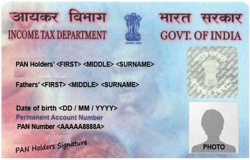

In [9]:
original

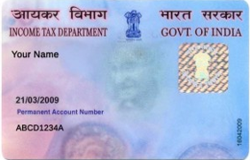

In [10]:
tampered

In [11]:
# cv2
original = cv2.imread('/content/pan_card_tampering/image/original.png')
tampered = cv2.imread('/content/pan_card_tampering/image/tampered.png')

#### Converting the size of tampered and original image.

In [12]:
# convert the image into greyscale
original_grey = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_grey = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [13]:
original_grey.size

40000

In [14]:
tampered_grey.size

40000

#### Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.  

In [15]:
(score,diff) = structural_similarity(original_grey, tampered_grey, full=True)
diff= (diff * 255).astype('uint8')
print(f"SSIM: {score}" )

SSIM: 0.31678790332739426


#### Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [16]:
# calculate thresholds and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [17]:
# loop over contours
for c in cnts:
  #applying contours on image
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y), (x+w, y+h), (0, 0, 225), 2)
  cv2.rectangle(tampered, (x,y), (x+w, y+h), (0, 0, 225), 2)

original image format


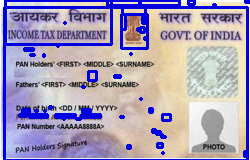

In [18]:
# display original with contour
print('original image format')
Image.fromarray(original)

Tampered image format


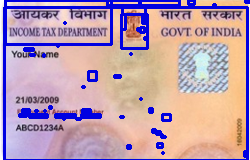

In [19]:
# display tempered with contour
print('Tampered image format')
Image.fromarray(tampered)

Different Image


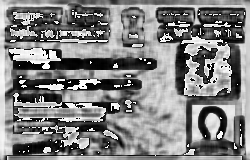

In [20]:
# display difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


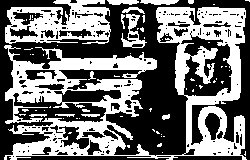

In [21]:
# display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

# Summary
#### Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition. 
#### As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.
#### Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  

# Scope
#### This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like adhar, voter id, etc.